<a href="https://www.kaggle.com/code/oscarm524/a-simple-book-recommendation-system?scriptVersionId=126780407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Book Recommendation System

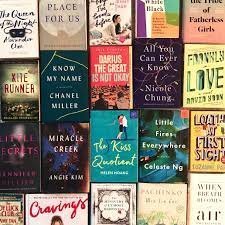

# The Task

The goal is to create a recommendation model based on historical transactions and item features. For any given product, the model should return its five best recommendations. In order to create a recommender model, the participants are provided with historical transaction and descriptive item data in the form of structured text files (.csv). For more information about the data click [here](https://www.kaggle.com/datasets/oscarm524/book-recommendation)

# Reading the data files

In [1]:
import pandas as pd
import numpy as np

items = pd.read_csv('/kaggle/input/book-recommendation/items.csv', sep = '|')
transactions = pd.read_csv('/kaggle/input/book-recommendation/transactions.csv', sep = '|')
evaluation = pd.read_csv('/kaggle/input/book-recommendation/evaluation.csv')

items.head()

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"


In [2]:
transactions.head()

,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0


In [3]:
evaluation.head()

,itemID
0,12
1,45274
2,10104
3,41371
4,14015


# Feature Engineering

To begin, we used the textblob language detection package to determine the language of each book. This approach involves taking the book titles and using the detect_language function to output a two-letter language code (ISO 639-1 codes). All books with numerical titles or titles with less than four characters required a manual language search.

Following the language detection process, we created several categorical variables to further distinguish the books from one another. With the table of Thema Subject Categories (provided in the problem statement), we created several variables that relate to the general topic (first character of main topic variable), the second general topic (first two characters of the main topic variable), and the third general topic (first three characters of the main topic variable, where applicable). Next, we created a dummy variable for the seven most common detected languages. And finally, we created a dummy variable for each of the 50 most popular authors in the data set (the most frequently occuring authors). The purpose of all create dummy variables is to be able to distinguish books from one another for our "k-Nearest Neighbor" approach using the calculated Euclidean distance, cosine similarity, or Manhanttandistance as measure of similarity between observations.

# First Approach

After the several features are engineered, we are ready to start implementing our first recommendation engine. The recommendation system relies on similarity, which can be measured with the Euclidean distance, cosine similarity or Manhattan distance, and transaction activity.


PROGRAM Book_Recommendation:
  
  FOR each book in evaluation.csv
  
    IF book is not in transactions.csv
      THEN provide the five-nearest neighbors as the recommendations;
    
    ELSE 
      THEN extract book that were click, basket, or order in the same sessions;
      
        IF the number of extracted books from the previous step is greater than or equal to 5
          THEN provide the five-nearest neighbors as the recommendations;
        
        ELSE
          THEN provide the five-nearest neighbors as the recommendations;
          
        ENDIF;
    
    ENDIF;
  
  ENDFOR;

END.

# Second Approach

After the first approach, we implement our second recommendation engine, wich is an improvement of the first recommendation engine. The recommendation system relies on similarity, which can measured with the Euclidean distance, cosine similarity or Manhattan distance, and transaction activity. On top of that, we complement similarity with popularity score, on books with transaction activity, which was engineered by the means of outlier analysis techniques. Notice that we use the algorithm presented on page 78 of [Outlier Analysis](https://www.amazon.com/Outlier-Analysis-Charu-C-Aggarwal/dp/3319475770/ref=sr_1_1?keywords=outlier+analysis&qid=1664463727&qu=eyJxc2MiOiIxLjIwIiwicXNhIjoiMC42OCIsInFzcCI6IjAuNjcifQ%3D%3D&sprefix=outlier+ana%2Caps%2C230&sr=8-1)

PROGRAM Book_Recommendation_Rating:
  
  FOR each book in transaction.csv
    Compute their outlier socre using the algorithm presented on page 78 of Outlier Analysis. After that, we standardize these scores to 1-5 scale;
  
  ENDFOR;
    
  
  FOR each book in evaluation.csv
  
    IF book is not in transactions.csv
      THEN provide the five-nearest neighbors as the recommendations;
    
    ELSE 
      THEN extract book that were click, basket, or order in the same sessions (with their corresponding popularity scores);
      
        IF the number of extracted books from the previous step is greater than or equal to 20
          THEN provide the five-nearest neighbors with the highest popularity socres as the recommendations;
        
        ELSE
          THEN provide the five-nearest neighbors with the highest popularity scores as the recommendations;
          
        ENDIF;
    
    ENDIF;
  
  ENDFOR;

END.



# GitHub Link

For detailed information about the code click [here](https://github.com/oscarm524/Data-Mining-Cup/tree/main/DMC-2021).